对泰坦尼克号数据进行分析，哪些因素，会导致乘客的生还率更高

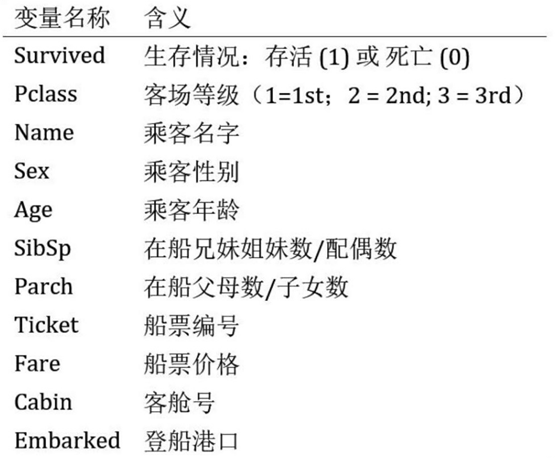

影响乘客生还率的因素很多，这里只讨论乘客的性别、年龄、以及舱位是否对生还率产生影响。<p>
1.性别对生还率的影响<p>
2.年龄对生还率的影响<p>
3.舱位对生还率的影响<p>
4.年龄和性别共同对生还率的影响<p>
5.年龄和舱位共同对生还率的影响<p>
6.性别和舱位共同对生还率的影响<p>
7.年龄、性别、舱位共同对生还率的影响<p>

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
plt.style.use('seaborn')#设置样式
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 查看数据

In [4]:
titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [7]:
titanic.info()#是否有缺失值，数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.describe(include='object')  #'object'

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Farrell, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## 生成数据分析报告

In [49]:
#titanic.profile_report(title = 'titanic').to_file(output_file='titanic.html')

# 删除重复数据

In [11]:
titanic[titanic.duplicated()]   #查看是否有重复数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [70]:
# df.drop_duplicats(subset = ['price','cnt'],keep='last',inplace=True) #删除重复数据

In [12]:
titanic=titanic.drop("Cabin",axis=1)#删除cabin列     # 原地删除 inplace=True
titanic=titanic.drop("PassengerId",axis=1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


# 缺失值处理

In [14]:
titanic["Age"].median()

28.0

In [15]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())#中位数填充，均值mean
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
titanic["Embarked"].mode()

0    S
dtype: object

In [73]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
titanic.groupby(['Embarked'])['Embarked'].count()#看有多少个

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [75]:
titanic["Embarked"].mode() #众数

0    S
dtype: object

In [18]:
titanic["Embarked"] = titanic["Embarked"].fillna('S')#众数填充
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [20]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 数据探索性分析

## 总体存活比例

<Figure size 720x360 with 0 Axes>

Text(0, 0.5, '数量')

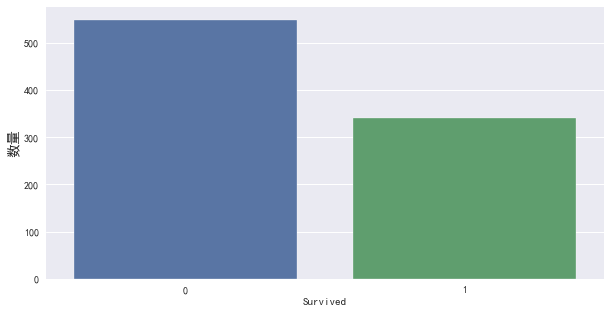

In [21]:
plt.figure(1 , figsize = (10 , 5))
sns.countplot(x = 'Survived' , data = titanic)#柱状图
plt.ylabel('数量',fontsize=14)
plt.show()

<Figure size 720x360 with 0 Axes>

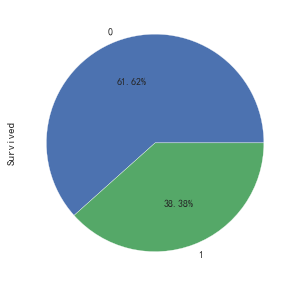

In [22]:
plt.figure(1 , figsize = (10 , 5))
titanic['Survived'].value_counts().plot.pie(autopct = '%.2f%%')#查看存活比例
plt.show()

## 性别是否影响生存率

### 男女比例

<Figure size 720x360 with 0 Axes>

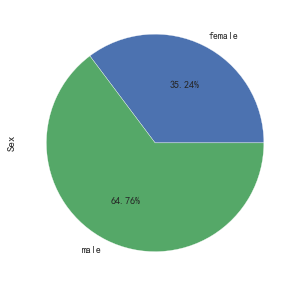

In [23]:
plt.figure(1 , figsize = (10 , 5))
titanic.groupby('Sex')['Sex'].count().plot.pie(autopct = '%.2f%%')

### 性别和是否生存的关系

<Figure size 720x360 with 0 Axes>

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


<Figure size 720x360 with 0 Axes>

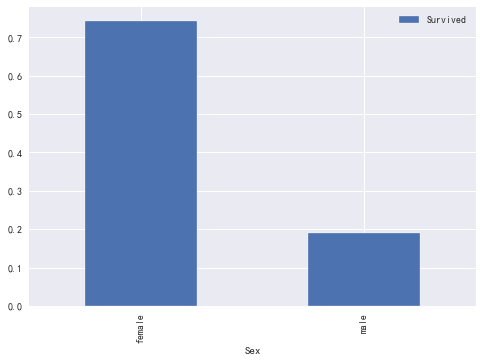

In [24]:
#性别与是否生存的关系 Sex
plt.figure(1 , figsize = (10 , 5))
print(titanic.groupby(['Sex','Survived'])['Survived'].count())#0是男，1是女
titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()#0：male，1：female

女性的生存率明显高于男性

## 船舱等级是否影响生存率

### 船舱等级的分布

<Figure size 720x360 with 0 Axes>

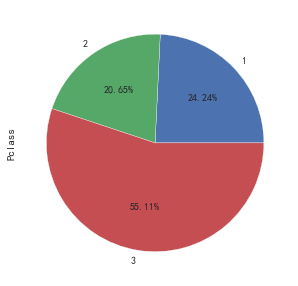

In [25]:
plt.figure(1 , figsize = (10 , 5))
titanic.groupby('Pclass')['Pclass'].count().plot.pie(autopct = '%.2f%%')
plt.show()

### 船舱等级和是否生存的关系

<Figure size 720x360 with 0 Axes>

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64


<Figure size 720x360 with 0 Axes>

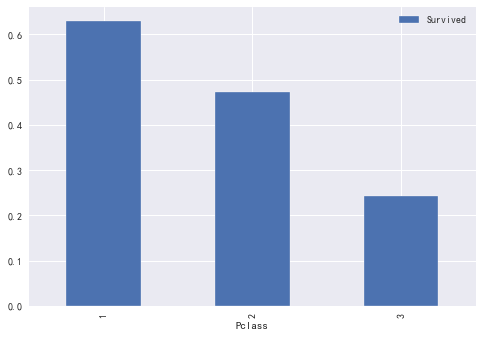

In [26]:
#船舱等级和生存与否的关系 Pclass
plt.figure(1 , figsize = (10 , 5))
print(titanic.groupby(['Pclass','Survived'])['Pclass'].count())
titanic[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()


3等船舱人数最多，生存率最低

## 年龄是否影响生存率

### 年龄的分布

<Figure size 720x360 with 0 Axes>

(-10.0, 70.0)

Text(0.5, 0, 'Age')

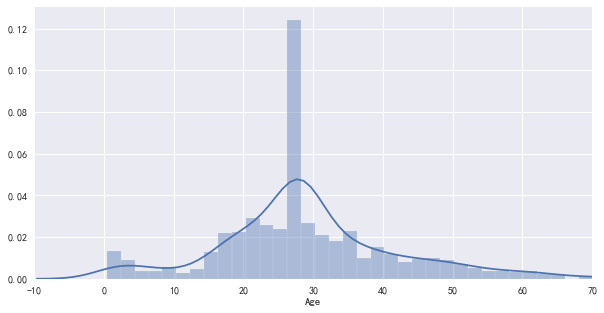

In [27]:
plt.figure(1 , figsize = (10 , 5))
sns.distplot(titanic['Age'],bins=40)
plt.xlim(([-10,70]))
plt.xlabel('Age')

### 年龄与生存率的关系

(-10.0, 70.0)

Text(0.5, 0, 'Survived')

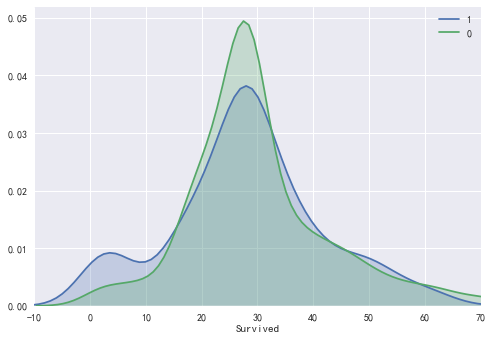

In [28]:
sns.kdeplot(titanic.Age[titanic.Survived==1], label='1', shade=True)
sns.kdeplot(titanic.Age[titanic.Survived==0], label='0', shade=True)
plt.xlim(([-10,70]))
plt.xlabel('Survived')

### 对年龄进行均匀分组，按照10岁一组进行划分,不同年龄段的生存率

In [29]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
bins=np.arange(0,90,10)
titanic['Age_band']=pd.cut(titanic.Age,bins)

In [31]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_band
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(20, 30]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(30, 40]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(20, 30]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(30, 40]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(30, 40]"


In [32]:
#每个年龄段里面，男、女的人数
titanic_ageband=titanic.groupby(['Age_band','Survived'])['Age_band'].count()
titanic_ageband_survived=titanic.groupby('Age_band')['Survived'].mean()

<Figure size 720x360 with 0 Axes>

Text(0, 0.5, 'Survival rate')

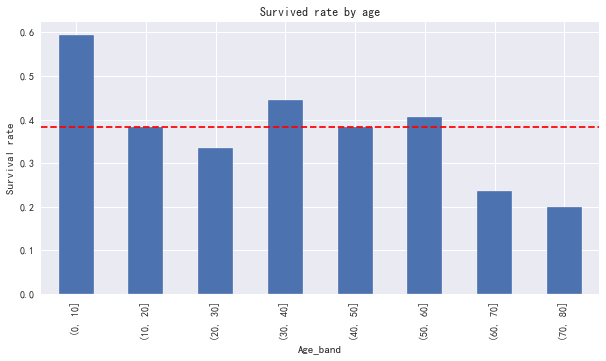

In [33]:
plt.figure(1 , figsize = (10 , 5))
titanic_ageband_survived.plot.bar(title='Survived rate by age')
plt.ylabel('Survival rate')
plt.axhline(y=0.383,color='r',linestyle='--') #平均存活比例

年龄段在20-40岁之间人数最多，但这个年龄段的生还率却不是最高的，反而年龄较小（0~10岁）的生还率是最高的

## 年龄和性别与生还率的关系

### 所有乘客中年龄和性别的人数统计

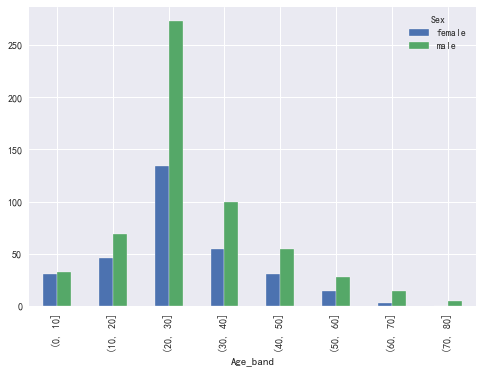

In [34]:
titanic_df1=titanic.pivot_table(values='Survived',index='Age_band',columns='Sex',aggfunc='count')
titanic_df1.plot(kind='bar')

20-30岁之间的男性居多

### 生还乘客中年龄和性别的人数统计

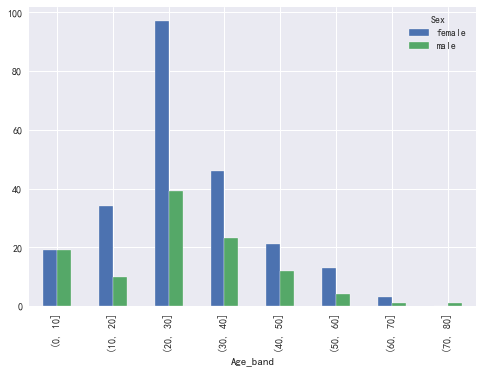

In [35]:
titanic_df2=titanic[titanic.Survived==1]
titanic_survived=titanic_df2.pivot_table(values='Survived',index='Age_band',columns='Sex',aggfunc='count')
titanic_survived.plot(kind='bar')

生还乘客中20-30之间的女性居多

### 年龄和性别的生还率

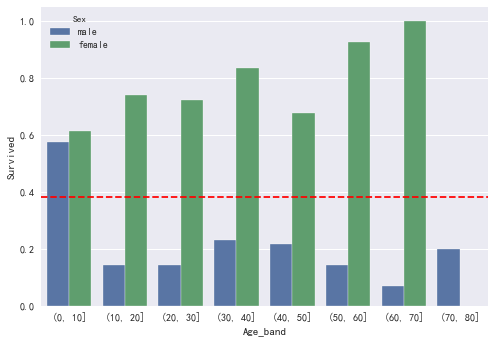

In [36]:
#年龄和性别的生还率
sns.barplot(data=titanic,x='Age_band',y='Survived',hue='Sex',ci=None)
plt.axhline(y=0.383,color='r',linestyle='--')

男性的人数明显多于女性，但女性的生还率明显高于男性，且女性的生还率都在40%以上。
综上可以看出，性别对生还率的影响大于年龄的影响。

## 年龄和舱位与生还率的关系

### 乘客中年龄和舱位的人数统计

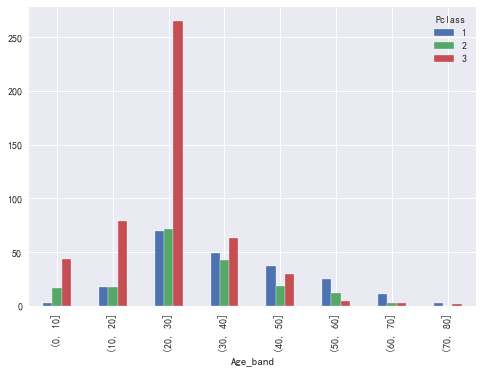

In [37]:
titanic_df3=titanic.pivot_table(values='Survived',index='Age_band',columns='Pclass',aggfunc='count')
titanic_df3.plot(kind='bar')

20-30岁之间的三等舱的人数最多

### 生还乘客中年龄和舱位的人数统计

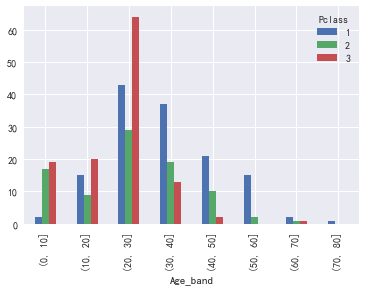

In [27]:
#生还乘客中年龄和舱位的人数统计
titanic_df4=titanic[titanic.Survived==1]
titanic_survived=titanic_df4.pivot_table(values='Survived',index='Age_band',columns='Pclass',aggfunc='count')
titanic_survived.plot(kind='bar')

### 乘客中年龄和舱位的生还概率

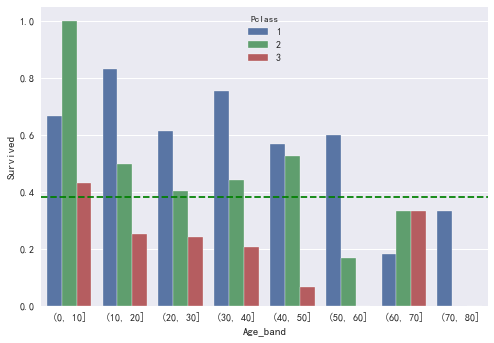

In [38]:
sns.barplot(data=titanic,x='Age_band',y='Survived',hue='Pclass',ci=None)
plt.axhline(y=0.383,color='g',linestyle='--')

从图中看出：3舱的人数最多，但3舱的生还率最小。而在0-50岁的年龄区间，1、2舱舱的生还率都大于40%。
同一个年龄段，除了0-10岁和60-70岁，区间外，1舱的生还率最高。
不同年龄段，也是1舱的生还率>2舱>3舱

## 还可以分析
性别和舱位共同对生还率的影响
年龄、性别、舱位共同对生还率的影响

# 数据编码

In [39]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_band
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(20, 30]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(30, 40]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(20, 30]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(30, 40]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(30, 40]"


### 方法1

In [42]:
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

In [40]:
titanic.loc[titanic["Sex"] == "male","Sex"] = 0
titanic.loc[titanic["Sex"] == "female","Sex"] = 1
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_band
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,"(20, 30]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,"(30, 40]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,"(20, 30]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,"(30, 40]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,"(30, 40]"


In [41]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [42]:
titanic.loc[titanic["Embarked"] == "S","Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C","Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q","Embarked"] = 2
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_band
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,"(20, 30]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,"(30, 40]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,"(20, 30]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,"(30, 40]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,"(30, 40]"


### 方法2

In [45]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_band
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,"(20, 30]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,"(30, 40]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,"(20, 30]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,"(30, 40]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,"(30, 40]"


#### labelencoder

In [43]:
from sklearn.preprocessing import LabelEncoder
titanic[['Sex','Embarked']].apply(LabelEncoder().fit_transform)

,Sex,Embarked
0,0,0
1,1,1
2,1,0
3,1,0
4,0,0
...,...,...
886,0,0
887,1,0
888,1,0
889,0,1


#### 哑编码

In [44]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_band
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,"(20, 30]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,"(30, 40]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,"(20, 30]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,"(30, 40]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,"(30, 40]"


In [45]:
temp=pd.get_dummies(titanic[['Embarked']])
temp

,Embarked_0,Embarked_1,Embarked_2
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
886,1,0,0
887,1,0,0
888,1,0,0
889,0,1,0


In [51]:
titanic.drop(columns=['Embarked'],inplace=True)

In [52]:
titanic_new = pd.concat([titanic,temp],axis=1)
titanic_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Age_band,Embarked_0,Embarked_1,Embarked_2
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,"(20, 30]",1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,"(30, 40]",0,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,"(20, 30]",1,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,"(30, 40]",1,0,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,"(30, 40]",1,0,0


# 特征的选择

In [53]:
#分析数据间关系,选择特征
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [41]:
# 选取特征
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
# 数据切分
x_data_train = titanic[features]#特征
y_data_train = titanic["Survived"]#标签

In [42]:
titanic[['Name',"Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]].to_csv("titanic_train_clean.csv") #保存数据

# 对测试集处理


In [35]:
titanic_test = pd.read_csv("titanic_test.csv")
titanic_test=titanic_test.drop("Cabin",axis=1)#删除cabin列
titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].median())#中位数填充
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())#中位数填充
titanic_test["Embarked"] = titanic_test["Embarked"].fillna('S')#众数填充
titanic_test.loc[titanic_test["Sex"] == "male","Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female","Sex"] = 1
titanic_test.loc[titanic_test["Embarked"] == "S","Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C","Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q","Embarked"] = 2
# 选取特征
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
# 数据切分
x_data_test = titanic_test[features]#特征

In [36]:
x_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


# 建模分析

## 逻辑回归

In [37]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [38]:
# 逻辑回归模型
lr = LogisticRegression()
params={'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
grid_search=GridSearchCV(lr,param_grid=params,cv=5)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

{'C': 0.1}

In [39]:
grid_search.score(x_data_train,y_data_train)

0.8092031425364759

In [40]:
grid_search.predict(x_data_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [41]:
lr_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
lr_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## KNN

In [42]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
params={'n_neighbors':[2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(knn,param_grid=params,cv=5)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

{'n_neighbors': 3}

In [43]:
grid_search.score(x_data_train,y_data_train)

0.8383838383838383

In [44]:
grid_search.predict(x_data_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [45]:
knn_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
knn_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


## 决策树

In [46]:
from sklearn import tree

In [47]:
dtree = tree.DecisionTreeClassifier()
params={'max_depth':[2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(dtree,param_grid=params,cv=5)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

{'max_depth': 6}

In [48]:
grid_search.score(x_data_train,y_data_train)

0.8653198653198653

In [49]:
grid_search.predict(x_data_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [50]:
dtree_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
dtree_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## 随机森林

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
RF = RandomForestClassifier(n_estimators=100)
params={'min_samples_split':[2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(dtree,param_grid=params,cv=5)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

{'min_samples_split': 8}

In [53]:
grid_search.score(x_data_train,y_data_train)

0.9169472502805837

In [54]:
grid_search.predict(x_data_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
rf_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
rf_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


## Adaboost

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
adaboost = AdaBoostClassifier(n_estimators=200)
params={'learning_rate':[0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8]}
grid_search=GridSearchCV(adaboost,param_grid=params,cv=5)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

{'learning_rate': 1.2}

In [58]:
grid_search.score(x_data_train,y_data_train)

0.8529741863075196

In [59]:
grid_search.predict(x_data_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
ad_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
ad_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## XGBoosting

In [67]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
params = {
        'n_estimators':range(100,200,50),
        'max_depth':range(2,15,4),
        'learning_rate':np.linspace(0.01,3,5),
        }
grid_search=GridSearchCV(xgboost_model,param_grid=params,cv=5)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

D:\conda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.01, 'max_depth': 14, 'n_estimators': 150}

In [68]:
grid_search.score(x_data_train,y_data_train)

0.8967452300785634

In [69]:
ad_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
ad_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [70]:
xgboost_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=14, n_estimators=150)
best_model=xgboost_model.fit(x_data_train, y_data_train)

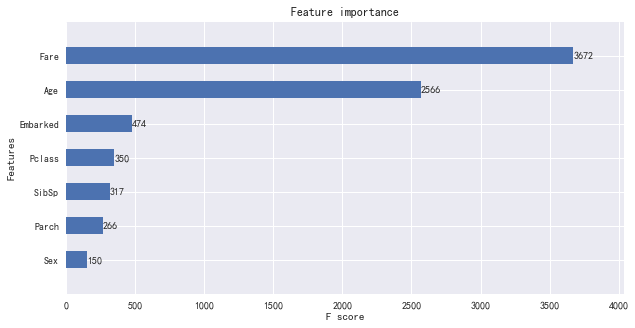

In [72]:
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(10,5))
plot_importance(best_model,height=0.5,ax=ax,max_num_features=64)
plt.show()